<h2>MNIST dataset in Keras library</h2>

## Imports

In [1]:
# - TensorFlow
import tensorflow as tf
# - Dataset
from tensorflow.keras.datasets import mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D

# Print some stuff
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.0.0


<h2>Load data</h2>

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [3]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


## Linear model

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 3s 47us/sample - loss: 0.5751 - accuracy: 0.8553 - val_loss: 0.2987 - val_accuracy: 0.9237
Epoch 2/6
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3361 - accuracy: 0.9078 - val_loss: 0.2584 - val_accuracy: 0.9292
Epoch 3/6
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3056 - accuracy: 0.9151 - val_loss: 0.2451 - val_accuracy: 0.9312
Epoch 4/6
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2906 - accuracy: 0.9193 - val_loss: 0.2363 - val_accuracy: 0.9348
Epoch 5/6
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2818 - accuracy: 0.9206 - val_loss: 0.2319 - val_accuracy: 0.9372
Epoch 6/6
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2747 - accuracy: 0.9228 - val_loss: 0.2311 - val_accuracy: 0.9373

Test Accuracy: 92.50%
Time elapsed: 12.05 sec


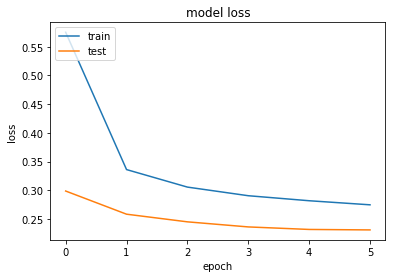

In [4]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = lin_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN model

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 4s 71us/sample - loss: 0.3615 - accuracy: 0.8927 - val_loss: 0.1373 - val_accuracy: 0.9567
Epoch 2/6
54000/54000 [==============================] - 3s 58us/sample - loss: 0.1643 - accuracy: 0.9503 - val_loss: 0.0988 - val_accuracy: 0.9687
Epoch 3/6
54000/54000 [==============================] - 3s 61us/sample - loss: 0.1255 - accuracy: 0.9620 - val_loss: 0.0792 - val_accuracy: 0.9753
Epoch 4/6
54000/54000 [==============================] - 3s 58us/sample - loss: 0.1025 - accuracy: 0.9682 - val_loss: 0.0768 - val_accuracy: 0.9757
Epoch 5/6
54000/54000 [==============================] - 3s 56us/sample - loss: 0.0867 - accuracy: 0.9725 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 6/6
54000/54000 [==============================] - 3s 56us/sample - loss: 0.0772 - accuracy: 0.9759 - val_loss: 0.0679 - val_accuracy: 0.9782

Test Accuracy: 97.72%
Time elapsed: 20.06 sec


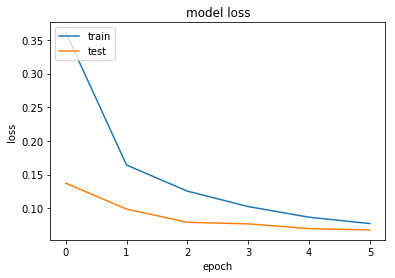

In [5]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ConvNet model

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 57s 1ms/sample - loss: 0.2998 - accuracy: 0.9058 - val_loss: 0.0679 - val_accuracy: 0.9803
Epoch 2/8
54000/54000 [==============================] - 52s 966us/sample - loss: 0.1086 - accuracy: 0.9661 - val_loss: 0.0462 - val_accuracy: 0.9878
Epoch 3/8
54000/54000 [==============================] - 51s 948us/sample - loss: 0.0816 - accuracy: 0.9751 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 4/8
54000/54000 [==============================] - 52s 962us/sample - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 5/8
54000/54000 [==============================] - 57s 1ms/sample - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0336 - val_accuracy: 0.9920
Epoch 6/8
54000/54000 [==============================] - 58s 1ms/sample - loss: 0.0514 - accuracy: 0.9831 - val_loss: 0.0322 - val_accuracy: 0.9922
Epoch 7/8
54000/54000 [==============================] - 

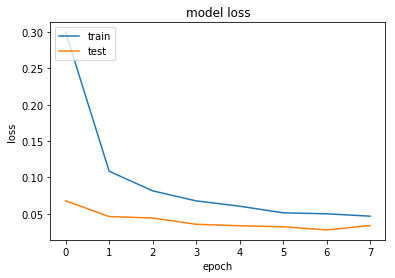

In [6]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(32, (3,3), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="relu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Plot examples</h2>

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


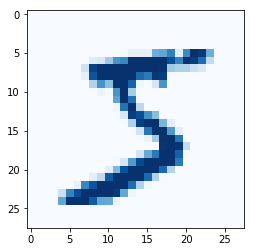

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


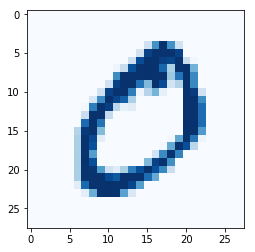

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


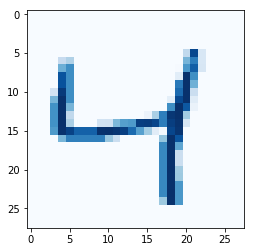

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


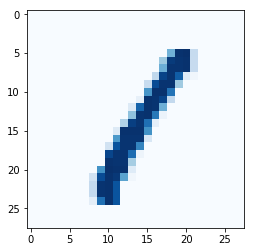

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


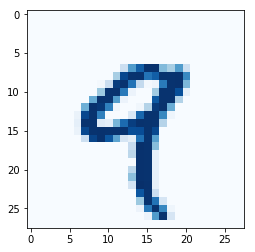

In [7]:
from matplotlib import pyplot as plt

# Plot 5 first images
for i in range(5):
    print("Label: {}".format(y_train[i]))
    plt.imshow(X_train[i], cmap=plt.cm.Blues)
    plt.show()